In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
log_train_data=pd.read_csv('데이콘_신용데이터/train_data_2')
test_data=pd.read_csv('데이콘_신용데이터/test.csv')

In [4]:
test_data.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0


In [5]:
log_train_data

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,1년_대출금액,총상환원리금
0,12480000,0,6,0.391569,18.092177,2.990720,2.772589,0.572737,0.000000,0.000000,0.000000,0.0,0.0,C,15.241026,0.000000
1,14400000,1,10,0.497788,18.689180,3.149740,3.091042,0.063972,0.000000,12.830869,12.363337,0.0,0.0,B,14.873301,13.317326
2,12000000,0,5,0.497788,18.379859,2.261763,2.708050,0.572737,0.000000,13.741482,11.931274,0.0,0.0,A,15.201805,13.893017
3,14400000,0,8,0.497788,18.698312,2.778198,2.772589,0.572737,0.000000,12.694116,11.938905,0.0,0.0,C,15.384127,13.079316
4,18000000,1,0,0.391569,18.088503,3.272985,2.995732,0.018724,0.000000,12.339471,11.911413,0.0,0.0,B,15.096445,12.841318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96287,14400000,0,10,0.497788,19.162618,2.335052,3.526361,0.254424,0.000000,13.789763,13.106577,0.0,0.0,C,15.384127,14.198559
96288,28800000,1,10,0.497788,18.698312,1.818077,3.258097,0.063972,0.000000,13.277192,13.658956,0.0,0.0,E,15.566448,14.179329
96289,14400000,0,1,0.497788,18.246327,2.504709,3.135494,0.254424,0.000000,14.213702,12.393535,0.0,0.0,A,15.384127,14.363843
96290,15600000,0,5,0.497788,18.010153,2.906901,3.091042,0.572737,1.098612,14.136411,13.614712,0.0,0.0,D,15.464169,14.602351


In [6]:
selected_columns = ['대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
                    '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수','총상환원리금','1년_대출금액']

### 설명변수들의 범위가 넓고 정규분포와 거리가 멀어서 RobustScale 사용 

In [7]:
# RobustScaler 인스턴스 생성
scaler = RobustScaler()

# 선택한 열들을 Robust Scaling
log_train_data[selected_columns] = scaler.fit_transform(log_train_data[selected_columns])

In [8]:
log_train_data.describe()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,1년_대출금액,총상환원리금
count,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000
mean,0.108979,0.330401,-0.032679,0.413361,0.039821,-0.135759,-0.093796,0.399922,0.187452,-0.581741,-0.468436,0.019083,0.003940,-0.016083,-0.605133
std,0.748465,0.470360,0.471109,0.117785,0.798817,0.792546,0.790366,0.211648,0.400058,2.576764,2.118270,0.440256,0.053310,0.757766,2.612983
min,-1.130435,0.000000,-0.750000,0.110643,-5.939744,-4.485767,-2.655243,0.000623,0.000000,-10.790385,-8.705468,0.000000,0.000000,-2.979989,-10.984321
25%,-0.478261,0.000000,-0.500000,0.391569,-0.451107,-0.554820,-0.541964,0.254424,0.000000,-0.538975,-0.524455,0.000000,0.000000,-0.507779,-0.540098
50%,0.000000,0.000000,0.000000,0.391569,0.000000,0.000000,0.000000,0.572737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.521739,1.000000,0.500000,0.497788,0.548893,0.445180,0.458036,0.572737,0.000000,0.461025,0.475545,0.000000,0.000000,0.492221,0.459902
max,1.826087,1.000000,0.500000,0.497788,7.336168,6.037643,3.162530,0.572737,3.433987,3.448885,2.064598,11.235445,1.609438,1.472499,3.035581


In [18]:
log_train_data['대출등급']

0        2
1        1
2        0
3        2
4        1
        ..
96287    2
96288    4
96289    0
96290    3
96291    2
Name: 대출등급, Length: 96292, dtype: int32

In [12]:
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('A','0'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('B','1'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('C','2'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('D','3'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('E','4'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('F','5'))
log_train_data['대출등급'] = log_train_data['대출등급'].apply(lambda x: x.replace('G','6'))

In [13]:
log_train_data['대출등급'] = log_train_data['대출등급'].astype(int)

In [14]:
log_train_data

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,1년_대출금액,총상환원리금
0,-0.313043,0.0,0.000,0.391569,-0.119095,0.012141,-0.736282,0.572737,0.000000,-10.790385,-8.705468,0.0,0.0,2,-0.047264,-10.984321
1,-0.173913,1.0,0.500,0.497788,0.769179,0.251300,-0.210899,0.063972,0.000000,-0.381266,-0.141285,0.0,0.0,1,-0.507779,-0.352490
2,-0.347826,0.0,-0.125,0.497788,0.308944,-1.084177,-0.842758,0.572737,0.000000,0.357474,-0.440578,0.0,0.0,0,-0.096381,0.107110
3,-0.173913,0.0,0.250,0.497788,0.782767,-0.307482,-0.736282,0.572737,0.000000,-0.492208,-0.435292,0.0,0.0,2,0.131947,-0.542505
4,0.086957,1.0,-0.750,0.391569,-0.124560,0.436655,-0.368141,0.018724,0.000000,-0.779916,-0.454336,0.0,0.0,1,-0.228328,-0.732510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96287,-0.173913,0.0,0.500,0.497788,1.473602,-0.973953,0.507287,0.254424,0.000000,0.396642,0.373564,0.0,0.0,2,0.131947,0.351038
96288,0.869565,1.0,0.500,0.497788,0.782767,-1.751461,0.064706,0.063972,0.000000,-0.019184,0.756201,0.0,0.0,4,0.360275,0.335686
96289,-0.173913,0.0,-0.625,0.497788,0.110264,-0.718797,-0.137563,0.254424,0.000000,0.740565,-0.120366,0.0,0.0,0,0.131947,0.482992
96290,-0.086957,0.0,-0.125,0.497788,-0.241137,-0.113919,-0.210899,0.572737,1.098612,0.677863,0.725553,0.0,0.0,3,0.232187,0.673403


In [19]:
y_test

43680    1
53174    1
49332    1
86142    2
44161    2
        ..
4984     1
51748    3
6279     4
60970    2
51185    0
Name: 대출등급, Length: 19259, dtype: int32

In [17]:
X = log_train_data.drop(['대출등급'], axis=1)  # 'ID'와 '대출등급' 열 제외한 열들을 특성으로 설정
y = log_train_data['대출등급']  # '대출등급'을 타겟으로 설정

# 학습(train) 세트와 테스트(test) 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 생성
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf_classifier.fit(X_train, y_train)

# 테스트 세트로 모델 평가
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.836024715717327

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      3301
           1       0.85      0.88      0.87      5799
           2       0.83      0.90      0.86      5477
           3       0.78      0.75      0.76      2733
           4       0.76      0.65      0.70      1481
           5       0.77      0.52      0.62       387
           6       0.93      0.16      0.27        81

    accuracy                           0.84     19259
   macro avg       0.83      0.67      0.71     19259
weighted avg       0.84      0.84      0.83     19259



In [20]:
# XGBoost 분류 모델 생성
xgb_classifier = XGBClassifier(random_state=42)

# 학습(train) 세트와 테스트(test) 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
xgb_classifier.fit(X_train, y_train)
                  #, early_stopping_rounds=100, eval_metric='logloss', eval_set=[(X_train,y_train)],verbose=True )

# 테스트 세트로 모델 평가
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8539384184017862

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3301
           1       0.86      0.88      0.87      5799
           2       0.87      0.89      0.88      5477
           3       0.82      0.81      0.81      2733
           4       0.79      0.75      0.77      1481
           5       0.77      0.67      0.72       387
           6       0.76      0.46      0.57        81

    accuracy                           0.85     19259
   macro avg       0.82      0.76      0.78     19259
weighted avg       0.85      0.85      0.85     19259



In [36]:
# XGBoost 분류 모델 생성

X = log_train_data.drop(['대출등급'], axis=1)  # 'ID'와 '대출등급' 열 제외한 열들을 특성으로 설정
y = log_train_data['대출등급']  # '대출등급'을 타겟으로 설정


# 학습(train) 세트와 테스트(test) 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#xgb_classifier = XGBClassifier(n_estimators = 400,learning_rate=0.1,max_depth=3)
# 모델 학습
xgb_classifier.fit(X_train, y_train)

# 테스트 세트로 모델 평가
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8539384184017862

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3301
           1       0.86      0.88      0.87      5799
           2       0.87      0.89      0.88      5477
           3       0.82      0.81      0.81      2733
           4       0.79      0.75      0.77      1481
           5       0.77      0.67      0.72       387
           6       0.76      0.46      0.57        81

    accuracy                           0.85     19259
   macro avg       0.82      0.76      0.78     19259
weighted avg       0.85      0.85      0.85     19259



In [21]:
# XGBoost 분류 모델 생성
xgb_classifier = XGBClassifier(random_state=42)

# 모델 학습
xgb_classifier.fit(X_train, y_train)
                  # , early_stopping_rounds=100, eval_metric='logloss', eval_set=[(X_train,y_train)],verbose=True )

# 테스트 세트로 모델 평가
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8539384184017862

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3301
           1       0.86      0.88      0.87      5799
           2       0.87      0.89      0.88      5477
           3       0.82      0.81      0.81      2733
           4       0.79      0.75      0.77      1481
           5       0.77      0.67      0.72       387
           6       0.76      0.46      0.57        81

    accuracy                           0.85     19259
   macro avg       0.82      0.76      0.78     19259
weighted avg       0.85      0.85      0.85     19259



In [22]:
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

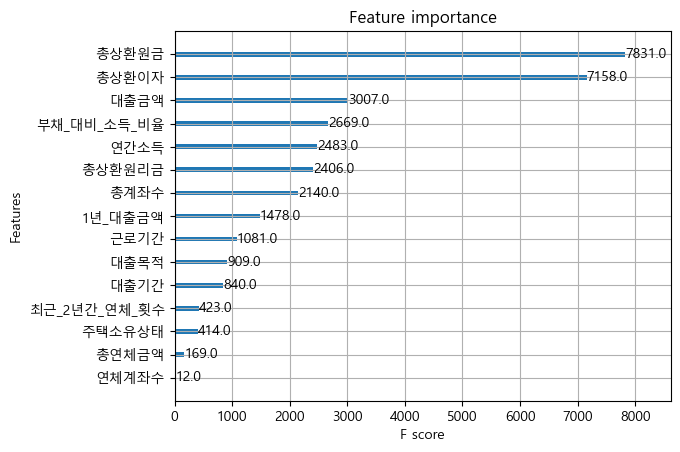

In [23]:
plot_importance(xgb_classifier)